<a href="https://colab.research.google.com/github/JulioCesarMS/StochasticProcesses/blob/main/Brownian_motion_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movimiento Browniano**

## Un poco de historia

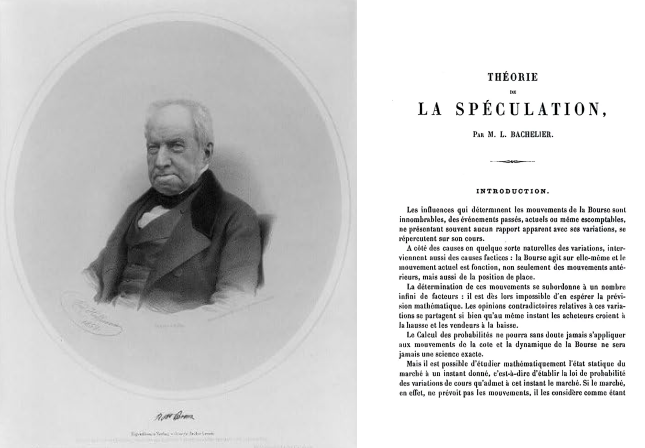

En 1827 el botánico escocés Robert Brown observó microscópicamente diminutos granos de polen suspendidos en un fluido y notó incrementos que eran altamente irregulares se cuestionó la posibilidad de que tuvieran vida.Se descubrió que las partículas más finas se movían más rápidamente, y que el movimiento era estimulado por el calor y por una disminución en la viscosidad del líquido. Sus investigaciones fueron publicadas como A Brief Account of Microscopical Observations Made in the Months of June, July and August 1827. Más tarde, en ese siglo, se postuló que el movimiento irregular era causado por un gran número de colisiones entre el polen y las moléculas del líquido (que son microscópicamente pequeñas en comparación con el polen). Se supone que los impactos ocurren con mucha frecuencia en cualquier pequeño intervalo de tiempo, independientemente unos de otros; y que el efecto de un impacto particular es pequeño en comparación con el efecto total.

Alrededor de 1900, Louis Bachelier, un estudiante de doctorado en matemáticas en la Sorbona, estaba estudiando el comportamiento de los precios de las acciones en la Bolsa de París y observó incrementos altamente irregulares. Desarrolló la primera especificación matemática del incremento reportado por Brown y lo utilizó como modelo para el incremento de los precios de las acciones.

Albert Einstein, en 1905, publicó un artículo sobre el movimiento Browniano "Über die von der molekularkinetischen Theorie der Wärme geforderte Bewegung von in ruhenden Flüssigkeiten suspendierten Teilchen" ("On the Motion of Small Particles Suspended in a Stationary Liquid, as Required by the Molecular Kinetic Theory of Heat"), publicado en Annalen der Physik, en el cual explicó el movimiento Browniano como resultado de las colisiones aleatorias entre partículas en suspensión y moléculas del fluido.


En la década de 1920, Norbert Wiener, un físico-matemático en el MIT, desarrolló el marco probabilístico completamente riguroso para este modelo. Este tipo de incremento se conoce ahora como movimiento browniano o proceso de Wiener. La posición del proceso se denota comúnmente por $𝐵$ o $𝑊$. El movimiento browniano se utiliza ampliamente para modelar la aleatoriedad en economía y en las ciencias físicas. Es fundamental en la modelización de las opciones financieras.

**Fuente:**
* Ubbo F. Wiersema (2008). *Brownian Motion Calculus*. John Wiley & Sons, Ltd.

## Definición:

Un proceso estocástico $\{B(t), t\geq 0\}$ es un movimiento Browniano si cumple las siguientes propiedades:

1.- $B(0) = 0$

2.- $\{B(t), t\geq 0\}$ tiene incrementos independientes y estacionarios.

3.- Para $t>0$, B(t) tiene distribución normal con media cero y varianza $t$.

La función de autocovarianza de $B$ para $s < t$ está dada por:

$$
\begin{align*}
\text{Cov}(B(s), B(t))
&= \mathbb{E}\big[(B(s) - B(0))(B(t) - B(0))\big] \\
&= \mathbb{E}\big[(B(s) - B(0))^2 + (B(s) - B(0))(B(t) - B(s))\big] \\
&= \mathbb{E}\big[(B(s) - B(0))^2\big] + \underbrace{\mathbb{E}\big[(B(s) - B(0))(B(t) - B(s))\big]}_{=0 \text{ por independencia}} \\
&= s
\end{align*}
$$

Se puede verificar que para $t < s$, $\text{Cov}(B(s), B(t)) = t$, entonces

$$
\text{Cov}(B(s), B(t)) = \min(s, t), \quad \text{para todo } s, t \ge 0.
$$


**Autocorrelación**

Sea $B(t)$ un movimiento browniano estándar, para $s > 0$ y $t > 0$
La autocorrelación entre $B(s)$ y $B(t)$ se define como:

$$
Corr(B(s), B(t)) = \frac{\min(s, t)}{\sqrt{s t}}.
$$


## **Simulación**

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import matplotlib.cm as cm
import matplotlib.patches as patches

In [221]:
class StochasticSimulation:

    def __init__(self, T=None, steps=100, n_times=1):
        self.steps = steps
        self.n_times = n_times
        # Si T no se proporciona, usar T = steps
        if T is None:
            self.T = steps
        else:
            self.T = T

        self.dt = self.T/ steps
        self.t = np.linspace(0, self.T, steps+1)


    def BrownianMotion(self):
        # creamos arreglo
        bm = np.zeros( (self.n_times, self.steps+1))
        # inicializa simulación
        for j in range(bm.shape[1]-1):
            for i in range(bm.shape[0]):
                bm[i][j+1] = bm[i][j] + np.sqrt(self.dt) * np.random.normal(size=1)

        df = pd.DataFrame(bm)
        return df

En este ejemplo, primero se definen los parámetros de la simulación: se tomarán $𝑁=10,000$ pasos, lo que permitirá generar una trayectoria muy detallada del proceso, y se simulará  $𝑀=1$ única trayectoria.

A continuación, se crea una instancia de la clase $StochasticSimulation$, pasando como argumentos el número de pasos y el número de trayectorias a simular. Esta clase se encarga de manejar los cálculos necesarios para generar procesos estocásticos.

Finalmente, se llama al método $BrownianMotion()$ de la instancia, el cual genera la trayectoria simulada del movimiento browniano. El resultado se almacena en df, un DataFrame que contiene los valores de la trayectoria a lo largo de los pasos de tiempo definidos.

In [227]:
# Parámetros
N = 10000        # número de pasos
M = 1            # número de trayectorias simuladas

sim = StochasticSimulation(steps=N, n_times=M)
df = sim.BrownianMotion()

/tmp/ipython-input-2120542965.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bm[i][j+1] = bm[i][j] + np.sqrt(self.dt) * np.random.normal(size=1)


/tmp/ipython-input-2994587377.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greys", M*2)


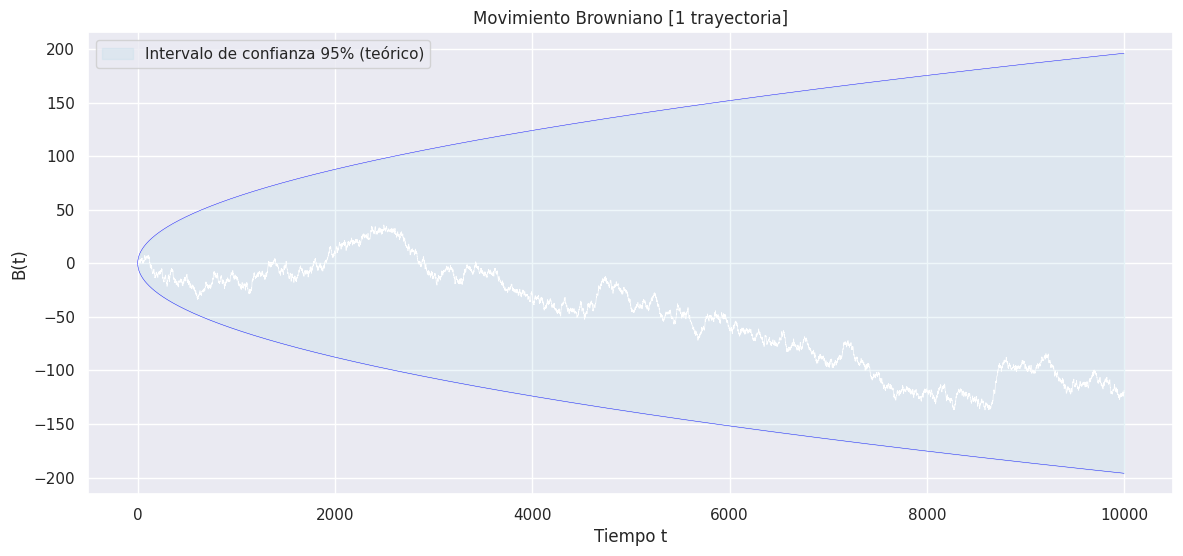

In [228]:
# Colormap
cmap = cm.get_cmap("Greys", M*2)
# lista de t
t = sim.t
std_teorica = np.sqrt(t)
# Media teórica
mean_B = [0]*len(t)
# Intervalos de confianza 95%
conf_upper =  mean_B + 1.96 * std_teorica
conf_lower =  mean_B - 1.96 * std_teorica
# Gráfico
plt.figure(figsize=(14,6))
for i in range(M):
    plt.plot(t, df.iloc[i,:].to_list(), color=cmap(i), linewidth=0.5)
plt.plot(t, conf_upper, 'blue', linewidth=0.3)
plt.plot(t, conf_lower, 'blue', linewidth=0.3)
plt.fill_between(t, conf_lower, conf_upper, color='lightblue', alpha=0.2, label='Intervalo de confianza 95% (teórico)')
plt.title(f"Movimiento Browniano [{M} trayectoria]")
plt.xlabel("Tiempo t")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()
plt.show()

## **Aproximación teórica mediante simulación**

Ahora vamos a simular $M=1000$ trayectorias y vamos averificar algunas propuedades como el valor esperado, varianza y autocorrelación mediante simulación,  para

1.-  $E[B(15)]$, $E[B(10)]$

2.-  $Var[B(15)]$, $Var[B(10)]$

3.-  $Corr([B(15)], Var[B(10)])$

In [248]:
# Parámetros
N = 10000      # número de pasos
M = 1000       # número de trayectorias simuladas

sim = StochasticSimulation(steps=N, n_times=M, T=T)
df = sim.BrownianMotion()

/tmp/ipython-input-2120542965.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bm[i][j+1] = bm[i][j] + np.sqrt(self.dt) * np.random.normal(size=1)


/tmp/ipython-input-2994587377.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greys", M*2)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


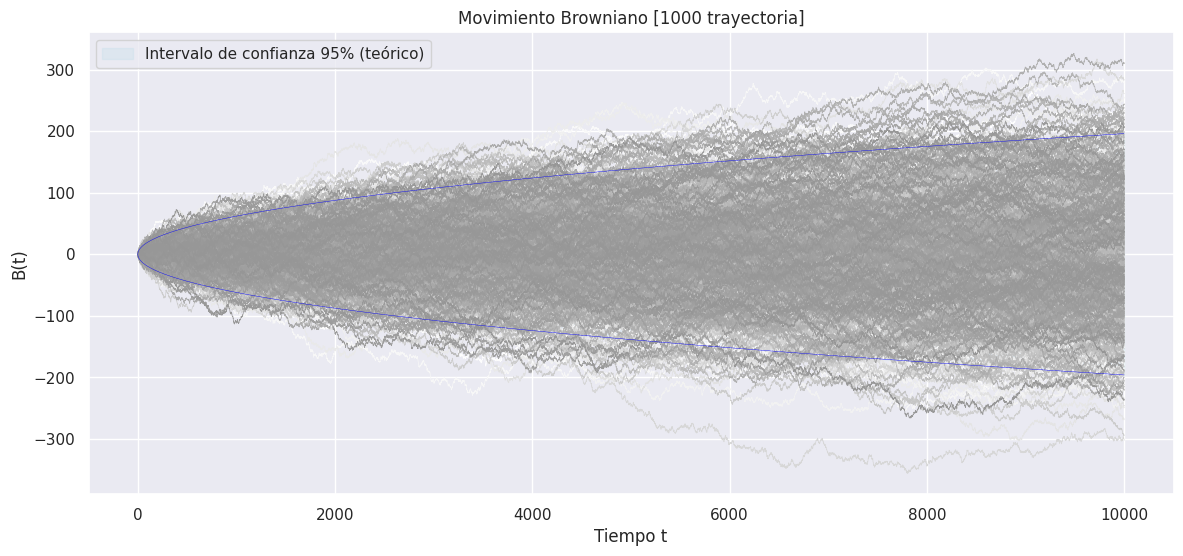

In [249]:
# Colormap
cmap = cm.get_cmap("Greys", M*2)
# lista de t
t = sim.t
std_teorica = np.sqrt(t)
# Media teórica
mean_B = [0]*len(t)
# Intervalos de confianza 95% usando desviación estándar teórica
conf_upper =  mean_B + 1.96 * std_teorica
conf_lower =  mean_B - 1.96 * std_teorica
# Grafica
plt.figure(figsize=(14,6))
for i in range(M):
    plt.plot(t, df.iloc[i,:].to_list(), color=cmap(i), linewidth=0.5)
plt.plot(t, conf_upper, 'blue', linewidth=0.3)
plt.plot(t, conf_lower, 'blue', linewidth=0.3)
plt.fill_between(t, conf_lower, conf_upper, color='lightblue', alpha=0.2, label='Intervalo de confianza 95% (teórico)')
plt.title(f"Movimiento Browniano [{M} trayectoria]")
plt.xlabel("Tiempo t")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()
plt.show()

Para el punto 1:

In [275]:
# Movimiento Browniano B(15)
B_15 = np.round(df.mean(axis=0).to_list()[15],4)
print(f"Media del movimiento Browniano B(15): {B_15}")
# Movimiento Browniano B(10)
B_10 = np.round(df.mean(axis=0).to_list()[10],4)
print(f"Media del movimiento Browniano B(10): {B_10}")

Media del movimiento Browniano B(15): 0.1541
Media del movimiento Browniano B(10): 0.0747


Para el punto 2, sabemos que $Var(B(t)) = t$

- Var(B(5)) = 15, y
- Var(B(5)) = 10

In [274]:
# Movimiento Browniano B(5)
var_B15 = np.round(df.var(axis=0).to_list()[15],4)
print(f"Media del movimiento Browniano B(15): {var_B15}")
# Movimiento Browniano B(6)
var_B10= np.round(df.var(axis=0).to_list()[10],4)
print(f"Media del movimiento Browniano B(10): {var_B10}")

Media del movimiento Browniano B(15): 14.4412
Media del movimiento Browniano B(10): 10.1663


El valor simulado se acerca mucho al valor teórico, entre más trayectorias se generen el resultado se aproxima más al teórico.

Para el punto 3:

Recordando la formula de la autocorrelación, $Corr(B(s), B(t)) = \frac{\min(s, t)}{\sqrt{s t}}$ y para $s=15$, y $t=10$, entonces, el valor teórico

- $Corr(B(15), B(10)) = \frac{min(15,10)}{\sqrt{15*10}} = \frac{10}{12.2474} \sim 0.8164$

In [273]:
# Movimiento Browniano Corr(B(15), B(10))
B_s = df.iloc[:, 15]
B_t = df.iloc[:, 10]
corr= np.round(np.corrcoef(B_s, B_t)[0,1],4)
print(f"Correlación del movimiento Browniano Cor(B(15),B(10)): {corr}")

Correlación del movimiento Browniano Cor(B(15),B(10)): 0.8114


Observamos que la simulación aproxima bastente bien el valor teórico.


Sean $\{B_1(t), t \ge 0\}$ y $\{B_2(t), t \ge 0\}$ dos movimientos Brownianos estándar independientes. Sea

$$
R(t) = \sqrt{B_1(t)^2 + B_2(t)^2}, \quad t \ge 0,
$$

donde \(R(t)\) representa la distancia al origen de un movimiento Browniano bidimensional.  

Se desea determinar el valor esperado de \(R(t)\), es decir:

$$
\mathbb{E}[R(t)] = \mathbb{E}\Big[\sqrt{B_1(t)^2 + B_2(t)^2}\Big].
$$


Podemos aproximar una solución de $\mathbb{E}[R(t)] $ para cualquier valor de $t$, la respuestá es sí. Consideremos la simulación anterior con $N=10,000$ pasos y $M=1000$ trayectorias.

In [276]:
# Parámetros
N = 10000      # número de pasos
M = 1000       # número de trayectorias simuladas

# Estavblecemos los parámetros
sim1 = StochasticSimulation(steps=N, n_times=M)
sim12 = StochasticSimulation(steps=N, n_times=M)
# simulación de los dos Movimiento Brownianos
B_1 = sim.BrownianMotion()
B_2 = sim.BrownianMotion()
# Distribución de R(t)
Rt = np.sqrt(B_1**2 + B_2**2)

/tmp/ipython-input-2120542965.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  bm[i][j+1] = bm[i][j] + np.sqrt(self.dt) * np.random.normal(size=1)


/tmp/ipython-input-3214043875.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greys", M*2)
/tmp/ipython-input-3214043875.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


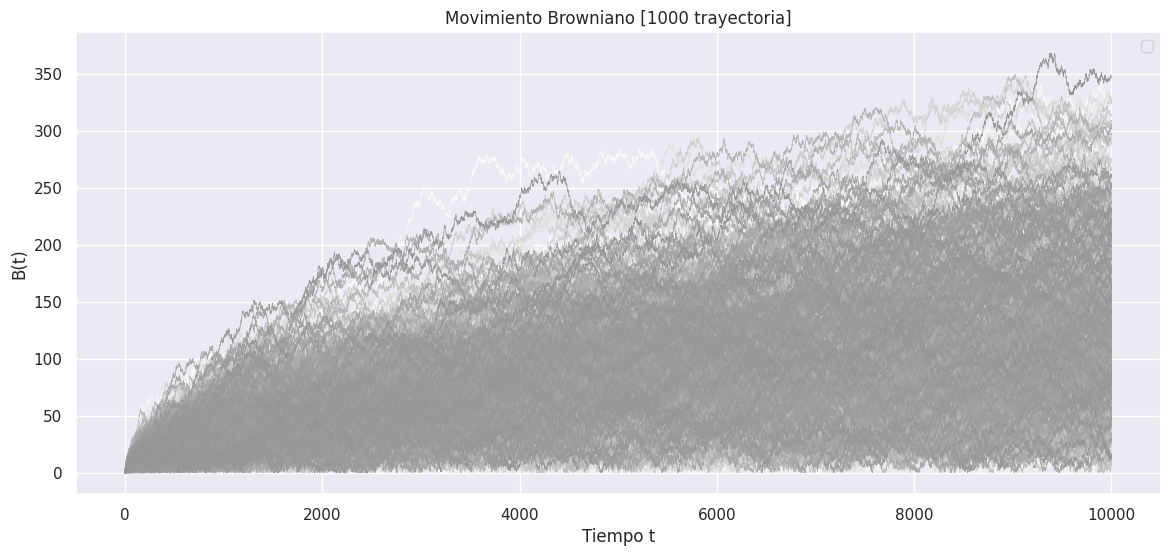

In [279]:
# Colormap
cmap = cm.get_cmap("Greys", M*2)
# lista de t
t = sim.t
std_teorica = np.sqrt(t)
# Media teórica
mean_B = [0]*len(t)
# Intervalos de confianza 95% usando desviación estándar teórica
#conf_upper =  mean_B + 1.96 * std_teorica
#conf_lower =  mean_B - 1.96 * std_teorica
# Grafica
plt.figure(figsize=(14,6))
for i in range(M):
    plt.plot(t, Rt.iloc[i,:].to_list(), color=cmap(i), linewidth=0.5)
plt.title(f"Simulación de R(t) [{M} trayectoria]")
plt.xlabel("Tiempo t")
plt.ylabel("B(t)")
plt.grid(True)
plt.legend()
plt.show()

La trayectorias siguen una caminata aleatoria de **Person**, y se puede demostrar que para cualquier $t$ fijo, la distribución es **Rayleigh**

## **Simulación de un Movimiento Browniano en dos dimensiones**

/tmp/ipython-input-3003700721.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("Greys", M*2)


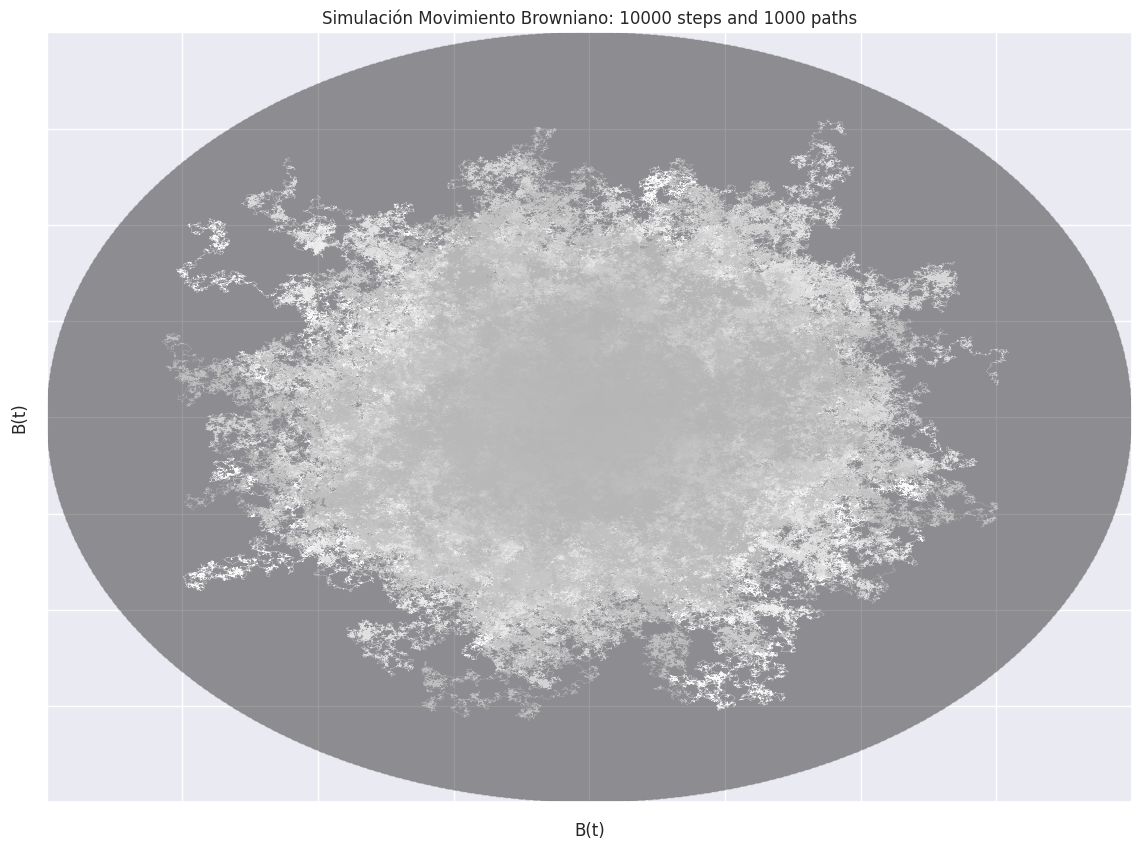

In [232]:
# Colormap (gradiente de gris)
cmap = cm.get_cmap("Greys", M*2)
centro = (0, 0)
circulo = patches.Circle(centro, 400, edgecolor='grey', facecolor='black', alpha=0.4, lw=1, ls='--')

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(14, 10))
ax.add_patch(circulo)
# Brownian Motion
for i in range(df.shape[0] - 1):
    if i < 800:
        ax.plot(df.iloc[i][:], df.iloc[i + 1][:], linewidth=0.2, color=cmap(i))  # Normaliza el valor de i
    else:
        continue
plt.title('Simulación Movimiento Browniano: {} steps and {} paths'.format(N, M))
plt.xlabel('B(t)')
plt.ylabel('B(t)')
plt.xlim(-400, 400)  # Set x-axis range
plt.ylim(-400, 400)
plt.gca().set_xticklabels([])  # quitar etiquetas eje X
plt.gca().set_yticklabels([])  # quitar etiquetas eje Y
plt.grid(True)
plt.show()